In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import brickschema
import datetime
from relaxation_graphs.fast_relaxation_graph import *
from evaluation.similarity_score import *
import uuid
import pickle
import time 
from rdflib import URIRef, Literal, BNode
from queries.mortar import queries as q1
%matplotlib inline

In [ ]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 32}

matplotlib.rc('font', **font)

In [ ]:
df =pd.read_csv('data_figure6.csv', index_col=0)
df

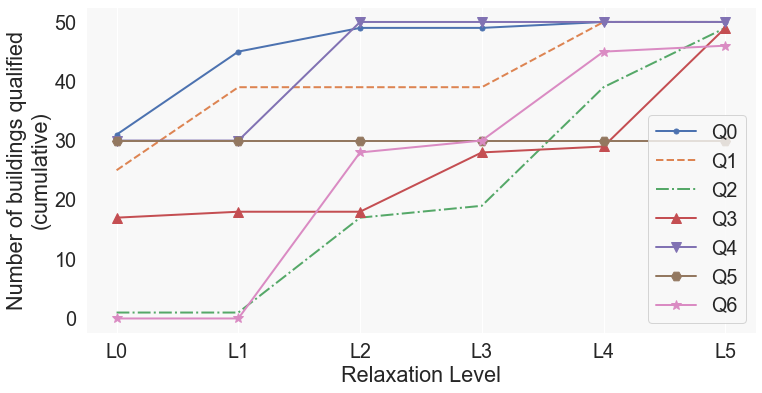

In [7]:
import seaborn as sns
# df = sns.load_dataset('iris')
sns.set(rc={'axes.facecolor':'#F8F8F8'}, font_scale=1.8)
plt.Figure()
plt.rcParams['figure.figsize'] = [12, 6]
linewidth=2
markersize=10
plt.grid(axis='y')
plt.plot(df.Q0, '-', label='Q0', marker='.', linewidth=linewidth, markersize=markersize)
plt.plot(df.Q1, '--', label='Q1', linewidth=linewidth, markersize=markersize)
plt.plot(df.Q2, '-.', label='Q2', linewidth=linewidth, markersize=markersize)
plt.plot(df.Q3, marker='^', label='Q3', linewidth=linewidth, markersize=markersize)
plt.plot(df.Q4, marker='v', label='Q4', linewidth=linewidth, markersize=markersize)
plt.plot(df.Q5, marker='H', label='Q5', linewidth=linewidth, markersize=markersize)
plt.plot(df.Q6, marker='*', label='Q6', linewidth=linewidth, markersize=markersize)
plt.legend()
plt.xlabel("Relaxation Level")
plt.ylabel("Number of buildings qualified\n(cumulative)")
plt.savefig('qualified_building_level.png')

In [103]:
useful_queries = [
"""SELECT ?sensor WHERE {
    ?sensor rdf:type brick:Zone_Air_Temperature_Sensor .
    ?sensor brick:isPointOf ?equip 
}""",
"""SELECT ?sp WHERE {
    ?sp rdf:type brick:Zone_Air_Temperature_Setpoint .
    ?sp brick:isPointOf ?equip
}""",
"""SELECT ?sensor ?sp ?equip WHERE {
    ?sensor  rdf:type     brick:Air_Flow_Sensor .
    ?sp      rdf:type     brick:Air_Flow_Setpoint .
    ?sensor  brick:isPointOf ?equip .
    ?sp      brick:isPointOf ?equip
}""",
"""SELECT * WHERE {
    ?equip    rdf:type  brick:VAV .
    ?equip    brick:hasPoint  ?air_flow .
    ?air_flow rdf:type   brick:Supply_Air_Flow_Sensor
    }""",
"""SELECT ?vav WHERE {
    ?vav rdf:type brick:VAV
}""",
"""SELECT ?floor ?room WHERE {
    ?floor rdf:type brick:Floor .
    ?room rdf:type brick:Room .
    ?room brick:isPartOf+ ?floor .
}""",
    
"""SELECT * WHERE {
    ?oat_damper a brick:Outside_Damper .
    ?pos a brick:Damper_Position_Command .
    ?oat_damper brick:hasPoint ?pos .
    ?oat a brick:Outside_Air_Temperature_Sensor
}""",
    
"""SELECT * WHERE {
    ?equip   rdf:type  brick:VAV .
    ?equip   brick:isFedBy  ?ahu .
    ?ahu     brick:hasPoint  ?upstream_ta .
    ?equip   brick:hasPoint  ?dnstream_ta .
    ?upstream_ta  rdf:type brick:Supply_Air_Temperature_Sensor .
    ?dnstream_ta  rdf:type brick:Supply_Air_Temperature_Sensor .
    ?equip   brick:hasPoint  ?vlv .
    ?vlv     rdf:type   brick:Valve_Command
}"""
]


In [104]:
files = os.listdir('Data - Brick models/')
brick_models = []

with open("brick_models.pkl", 'rb') as fp:
    brick_models = pickle.load(fp)
    